## Mapping the results of regression

In [41]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# country shape file divided by states
county = gpd.GeoDataFrame.from_file(
    './states/cb_2016_us_state_20m.shp', driver='ESRI Shapefile')
county.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,23,01779787,0400000US23,23,ME,Maine,00,79885221885,11748755195,"(POLYGON ((-68.92401 43.885407, -68.8747839999..."
1,15,01779782,0400000US15,15,HI,Hawaii,00,16634100855,11777698394,"(POLYGON ((-156.049651 19.780452, -156.006267 ..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.617919 36.499414, -94.3612029999..."
4,10,01779781,0400000US10,10,DE,Delaware,00,5047194742,1398720828,"POLYGON ((-75.773786 39.7222, -75.753227999999..."


In [43]:
county['STATEFP'] = county['STATEFP'].astype(int) # convert statefp to int for joining

In [44]:
results = pd.read_csv("stateresults.csv") # read in results file

In [59]:
results.sort_values('coef').head()

,state,score,num_ss,num,coef
45,50,0.823911,108,8466,-0.161541
2,4,0.874090,530,74592,-0.129880
27,31,0.824483,106,24766,-0.098775
44,49,0.847666,202,35528,-0.097875
14,18,0.864321,550,78924,-0.096111


In [45]:
# merge on state
m = county.merge(results, left_on='STATEFP', right_on='state')

(25, 50)

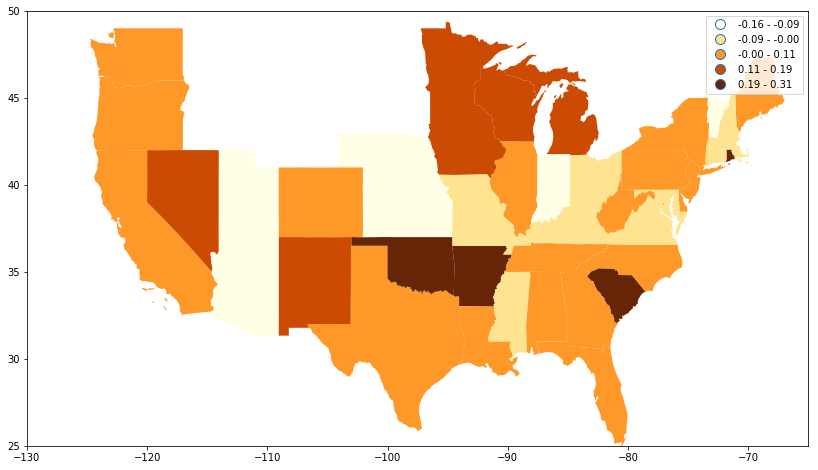

In [96]:
# plot without the missing (missing are states with <100 SSMC)
fig, ax = plt.subplots(figsize=(14,8))
m.dropna().plot(ax=ax, column='coef', cmap='YlOrBr', legend=True, scheme = 'fisher_jenks')
ax.set_xlim(-130,-65)
ax.set_ylim(25,50)


Quite choppy!  Neighboring states look really different.

In [62]:
# read in shapefile with pums areas
puma_shp = gpd.GeoDataFrame.from_file(
    'country_pums.shp', driver='ESRI Shapefile')
puma_shp.head()

,STATEFP10,PUMACE10,AFFGEOID10,GEOID10,NAME10,LSAD10,ALAND10,AWATER10,geometry
0,23,00700,7950000US2300700,2300700,Sagadahoc & Cumberland (North) Counties--Bath ...,P0,1481180566,586264808,"(POLYGON ((-69.76030899999999 43.710438, -69.7..."
1,23,00100,7950000US2300100,2300100,Northeast Maine--Aroostook & Washington Counties,P0,2147483647,2147483647,"(POLYGON ((-67.32259499999999 44.611595, -67.3..."
2,23,00900,7950000US2300900,2300900,Cumberland (Outside Portland) & York (East) Co...,P0,754438511,131632564,"(POLYGON ((-70.081609 43.712621, -70.078757 43..."
3,23,00800,7950000US2300800,2300800,South Maine--York (West) & Cumberland (West) C...,P0,2147483647,843948035,(POLYGON ((-70.61833227720101 42.9866095660672...
4,23,00200,7950000US2300200,2300200,"Northwest Maine--Oxford, Somerset, Franklin & ...",P0,2147483647,1895687134,"POLYGON ((-71.08000299999999 45.306987, -71.07..."


In [67]:
puma_shp['GEOID10'] = puma_shp['GEOID10'].astype(int)

In [127]:
# read in data with bandwidth 3
gwr_results_3 = pd.read_csv('gwr_results_3.csv')
gwr_results_3.head()

,puma,gay_coef
0,4804608,0.050678
1,4202500,0.020376
2,3702800,0.053344
3,4804612,0.050074
4,2801700,0.051469


In [128]:
# merge on puma
p = puma_shp.merge(gwr_results_3, left_on='GEOID10', right_on='puma')

(25, 50)

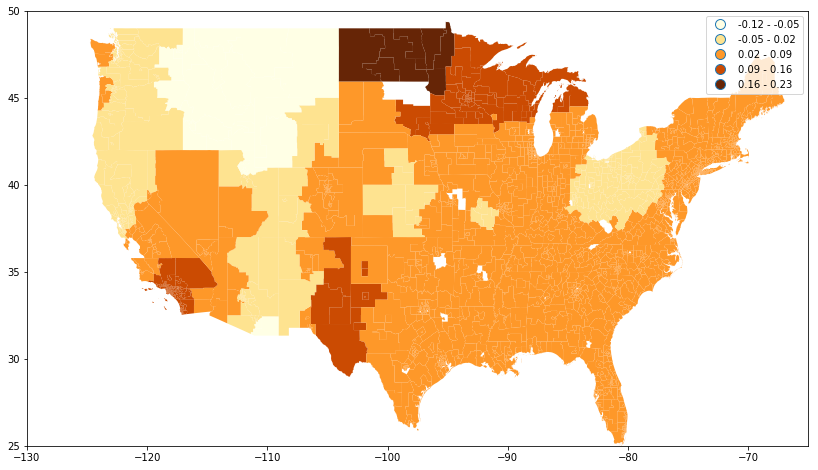

In [129]:
fig, ax = plt.subplots(figsize=(14,8))
p.dropna().plot(ax=ax, column='gay_coef', cmap='YlOrBr', legend=True, scheme='equal_interval')
ax.set_xlim(-130,-65)
ax.set_ylim(25,50)

In [108]:
# for women
gwr_results_w = pd.read_csv('gwr_results_women.csv')
gwr_results.head()
# merge on puma
pw = puma_shp.merge(gwr_results_w, left_on='GEOID10', right_on='puma')

In [121]:
# force same scale as men (small changes)
pw.loc[967,'gay_coef'] = -0.34
pw.loc[1246,'gay_coef'] = 0.43

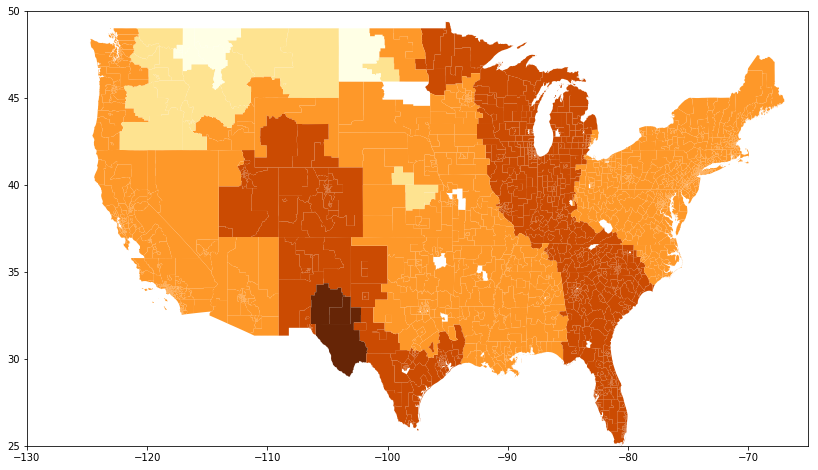

In [125]:
fig, ax = plt.subplots(figsize=(14,8))
pw.dropna().plot(ax=ax, column='gay_coef', cmap='YlOrBr', legend=True, scheme='equal_interval')
ax.set_xlim(-130,-65)
ax.set_ylim(25,50)
ax.legend_.remove()

In [123]:
# for men
gwr_results_m = pd.read_csv('gwr_results_men.csv')
gwr_results.head()
# merge on puma
pm = puma_shp.merge(gwr_results_m, left_on='GEOID10', right_on='puma')

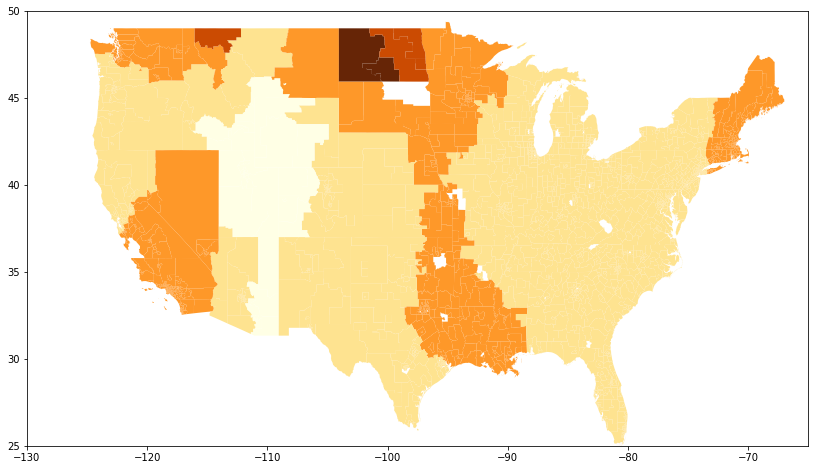

In [126]:
fig, ax = plt.subplots(figsize=(14,8))
pm.dropna().plot(ax=ax, column='gay_coef', cmap='YlOrBr', legend=True, scheme='equal_interval')
ax.set_xlim(-130,-65)
ax.set_ylim(25,50)
ax.legend_.remove()